In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing

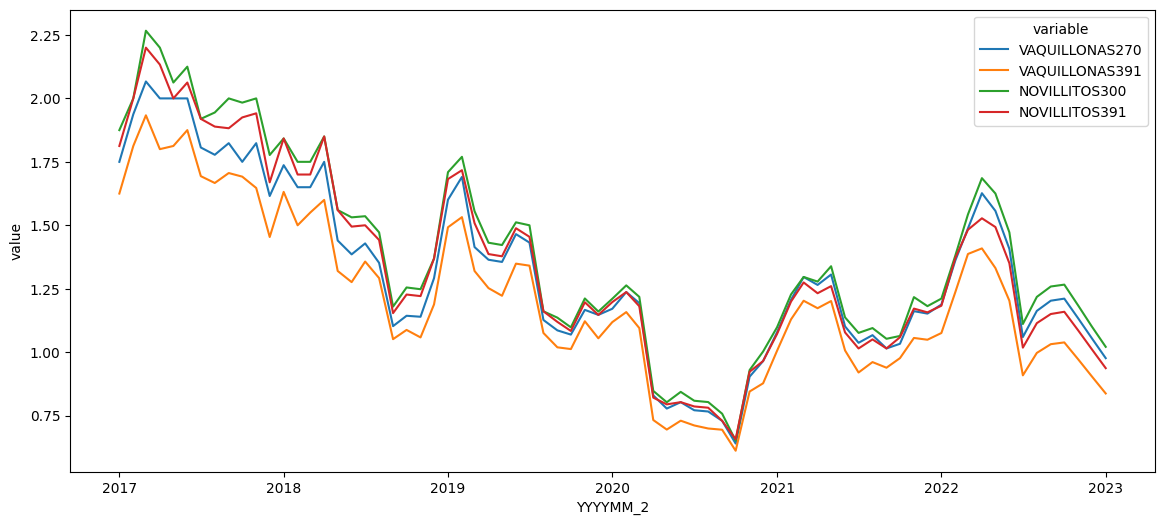

In [2]:
df = pd.read_csv("../data/df_precios_usd.csv", index_col=0).dropna()
df["YYYYMM_2"] = pd.to_datetime(df["YYYYMM"], format="%Y%m")
df["YYYYMM"] = pd.to_datetime(df["YYYYMM"], format="%Y%m").dt.to_period("M")
df.set_index("YYYYMM", inplace=True)

df_melt = df.melt(
    id_vars=["YYYYMM_2"],
    value_vars=["VAQUILLONAS270", "VAQUILLONAS391", "NOVILLITOS300", "NOVILLITOS391"],
)

fig0 = sns.lineplot(data=df_melt, x="YYYYMM_2", y="value", hue="variable")
fig0.figure.set_size_inches(14, 6)

In [3]:
def holt_winters_predict(Series, trend, seasonal, periods_to_predict):
    preds = (
        ExponentialSmoothing(Series, seasonal="add", freq="M")
        .fit()
        .forecast(periods_to_predict)
    )
    return preds


cols_to_predict = ["VAQUILLONAS270", "VAQUILLONAS391", "NOVILLITOS300", "NOVILLITOS391"]
periods = 10 * 12
df_preds = pd.DataFrame()
max_date = df.index.max()
for col in cols_to_predict:
    df_preds[col] = holt_winters_predict(
        df[col], trend="add", seasonal="add", periods_to_predict=periods
    )

df = pd.concat([df, df_preds])
df["PERIODO_INICIO"] = df.index.to_timestamp()

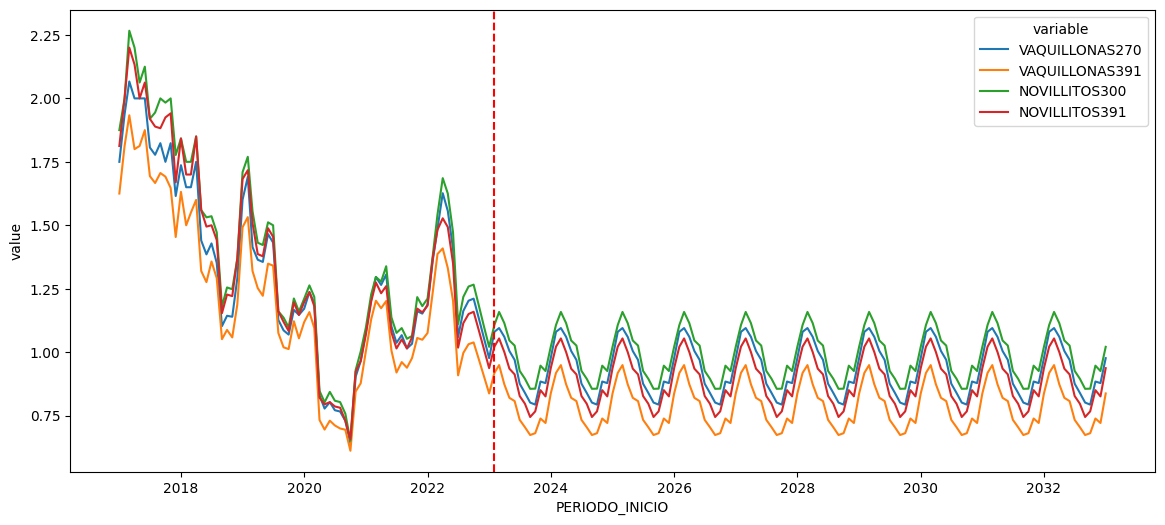

In [4]:
df_melt = df.melt(
    id_vars=["PERIODO_INICIO"],
    value_vars=["VAQUILLONAS270", "VAQUILLONAS391", "NOVILLITOS300", "NOVILLITOS391"],
)

fig0 = sns.lineplot(data=df_melt, x="PERIODO_INICIO", y="value", hue="variable")
fig0.figure.set_size_inches(14, 6)
fig0.axvline(max_date, color="red", linestyle="--")

In [10]:
df.index.max()

Period('2033-01', 'M')

In [7]:
df.to_csv("../data/df_precios_usd_w_forecast203301.csv")
df

,VAQUILLONAS270,VAQUILLONAS391,NOVILLITOS300,NOVILLITOS391,PERIODO_INICIO,usd_b,YYYYMM_2
2017-01,1.750000,1.625000,1.875000,1.812500,2017-01-01,16.0,2017-01-01
2017-02,1.937500,1.812500,2.000000,2.000000,2017-02-01,16.0,2017-02-01
2017-03,2.066667,1.933333,2.266667,2.200000,2017-03-01,15.0,2017-03-01
2017-04,2.000000,1.800000,2.200000,2.133333,2017-04-01,15.0,2017-04-01
2017-05,2.000000,1.812500,2.062500,2.000000,2017-05-01,16.0,2017-05-01
...,...,...,...,...,...,...,...
2032-09,0.801369,0.673542,0.855553,0.744503,2032-09-01,NaN,NaT
2032-10,0.793373,0.680696,0.856253,0.766740,2032-10-01,NaN,NaT
2032-11,0.884302,0.738518,0.946837,0.850297,2032-11-01,NaN,NaT
2032-12,0.878123,0.720930,0.925719,0.825769,2032-12-01,NaN,NaT
